# **🛠️Mantenimiento Predictivo** - *Predictive Maintenance*

### 🟢 **Información del Dataset**  - *Dataset Information*:

El conjunto de datos consta de 10,000 puntos de datos almacenados como filas, con 14 características distribuidas en columnas:

- **`UID`**: Identificador único que varía de 1 a 10,000.
- **`productID`**: Compuesto por una letra (L, M o H) que indica la calidad del producto. Además, tiene un número de serie específico para cada variante.
    - L (Baja): 50% de los productos.
    - M (Media): 30% de los productos.
    - H (Alta): 20% de los productos.
- **`air temperature [K]`** (Temperatura del aire en Kelvin): Generada mediante un proceso aleatorio normalizado con una desviación estándar de 2 K alrededor de 300 K.
- **`process temperature [K]`** (Temperatura del proceso en Kelvin): Generada mediante un proceso aleatorio, normalizada con una desviación estándar de 1 K, y sumada a la temperatura del aire más 10 K.
- **`rotational speed [rpm]`** (Velocidad de rotación en RPM): Calculada a partir de una potencia de 2860 W, con un ruido sobrepuesto distribuido normalmente.
- **`torque [Nm]`** (Torque en Newton-metro): Distribuido normalmente alrededor de 40 Nm, con una desviación estándar de 10 Nm y sin valores negativos.
- **`tool wear [min]`** (Desgaste de la herramienta en minutos): La calidad del producto influye en el desgaste de la herramienta:
    - H (Alta calidad): +5 minutos de desgaste.
    - M (Media calidad): +3 minutos de desgaste.
    - L (Baja calidad): +2 minutos de desgaste.

Nota: Hay dos objetivos. No cometer el error de utilizar uno de ellos como característica, ya que provocará fugas.

- **`target`** (Objetivo): Falla o no
- **`failure type`** (Falla de la máquina): Tipo de falla

**Fuente de datos:** https://www.kaggle.com/datasets/shivamb/machine-predictive-maintenance-classification

---

*The dataset consists of 10,000 data points stored as rows, with 14 features distributed across columns:*

- **_`UID`_**: *Unique identifier ranging from 1 to 10,000.*  
- **_`productID`_**: *Composed of a letter (L, M, or H) indicating product quality. Additionally, it includes a variant-specific serial number.*  
    - *L (Low quality): 50% of the products.*  
    - *M (Medium quality): 30% of the products.*  
    - *H (High quality): 20% of the products.*  
- **_`air temperature [K]`_**: *Generated using a random process normalized with a standard deviation of 2 K around 300 K.*  
- **_`process temperature [K]`_**: *Generated using a random process, normalized with a standard deviation of 1 K, and added to the air temperature plus 10 K.*  
- **_`rotational speed [rpm]`_**: *Calculated based on a power of 2860 W, with normally distributed noise overlaid.*  
- **_`torque [Nm]`_**: *Normally distributed around 40 Nm with a standard deviation of 10 Nm, and no negative values.*  
- **_`tool wear [min]`_**: *Product quality influences tool wear:*  
    - *H (High quality): +5 minutes of wear.*  
    - *M (Medium quality): +3 minutes of wear.*  
    - *L (Low quality): +2 minutes of wear.*  

*Note: There are two targets. Do not make the mistake of using one of them as a feature, as it will cause data leakage.*

- **_`target`_**: *Failure or not*  
- **_`failure type`_**: *Type of machine failure*  

*Data source: https://www.kaggle.com/datasets/shivamb/machine-predictive-maintenance-classification*


---

### 🟢 **Importación de librerias y carga de datos**  - *Importing libraries and data loading*:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar el archivo - Load the file
file = 'C:/Users/ar035073/Desktop/predictive_maintenance.csv'
df = pd.read_csv(file)

### 🟢 **Análisis inicial**  - *Initial analysis*:

 #### ⚪ **Primeras filas del dataset**  - *First rows of the dataset*:

In [3]:
# Observar las primeras filas del dataset - Look at the first rows of the dataset 
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


 #### ⚪ **Categorías**  - *Categories*:

In [4]:
#Ver las categorías del dataset - Look at the dataset categories
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


 #### ⚪ **Valores únicos**  - *Unique values*:

In [5]:
# Contar valores únicos por columna - Count unique values per column
valores_repetidos = df.nunique()
print(valores_repetidos)

UDI                        10000
Product ID                 10000
Type                           3
Air temperature [K]           93
Process temperature [K]       82
Rotational speed [rpm]       941
Torque [Nm]                  577
Tool wear [min]              246
Target                         2
Failure Type                   6
dtype: int64


Se decide eliminar la columna UDI, ya que puede usarse Product ID como identificador. Además se decide que las columnas Type, Target y Failure Type pueden ser consideradas como category.

*It was decided to remove the UDI column, since the Product ID could be used as an identifier. It was also decided that the Type, Target, and Failure Type columns could be considered categories.*

In [6]:
df = df.drop(columns=['UDI'])
df['Type'] = df['Type'].astype('category')
df['Target'] = df['Target'].astype('category')
df['Failure Type'] = df['Failure Type'].astype('category')

 #### ⚪ **Categorías (actualizado)**  - *Categories (updated)*:

In [7]:
#Ver las categorías actualizadas del dataset - Look at the updated dataset categories
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Product ID               10000 non-null  object  
 1   Type                     10000 non-null  category
 2   Air temperature [K]      10000 non-null  float64 
 3   Process temperature [K]  10000 non-null  float64 
 4   Rotational speed [rpm]   10000 non-null  int64   
 5   Torque [Nm]              10000 non-null  float64 
 6   Tool wear [min]          10000 non-null  int64   
 7   Target                   10000 non-null  category
 8   Failure Type             10000 non-null  category
dtypes: category(3), float64(3), int64(2), object(1)
memory usage: 498.6+ KB


 #### ⚪ **Valores nulos**  - *Null values*:

In [8]:
#Observar que no existen valores nulos en el dataset - Note that null values do not exist in the dataset
df.isnull().sum() 

Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

 #### ⚪ **Estadísticas descriptivas**  - *Descriptive estadistics*:

In [9]:
# Estadísticas descriptivas - Descriptive estadistics
df.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000
std,2.000259,1.483734,179.284096,9.968934,63.654147
min,295.300000,305.700000,1168.000000,3.800000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000


### 🟢 **Análisis de Datos Exploratorio**  - *Exploratory Data Analysis*:

In [10]:
import warnings
warnings.filterwarnings('ignore')

 #### ⚪ **Histogramas de variables numéricas**  - *Histograms of numerical variables*:

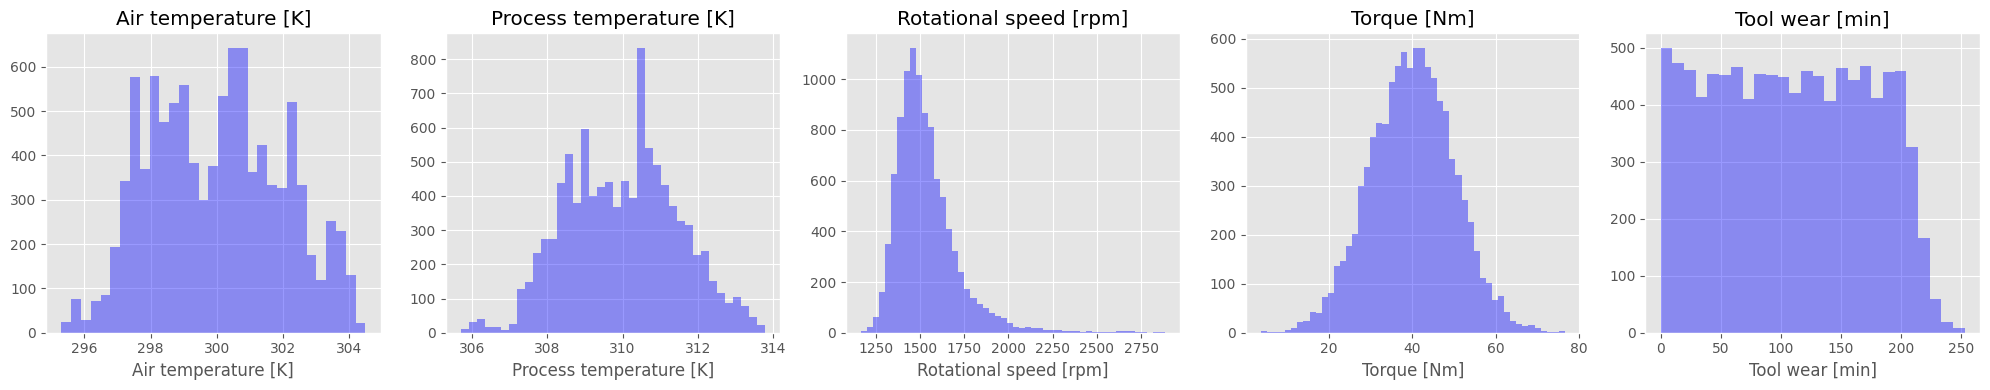

In [11]:
plt.style.use('ggplot')
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,4))

for i, variable in enumerate(numeric_columns):
  plt.subplot(1,5,i+1)
  sns.distplot(df[variable], kde = False, color='blue')
  plt.tight_layout()
  plt.title(variable)

 #### ⚪ **Visualización de parámetros**  - *Parameters Visualizations*:

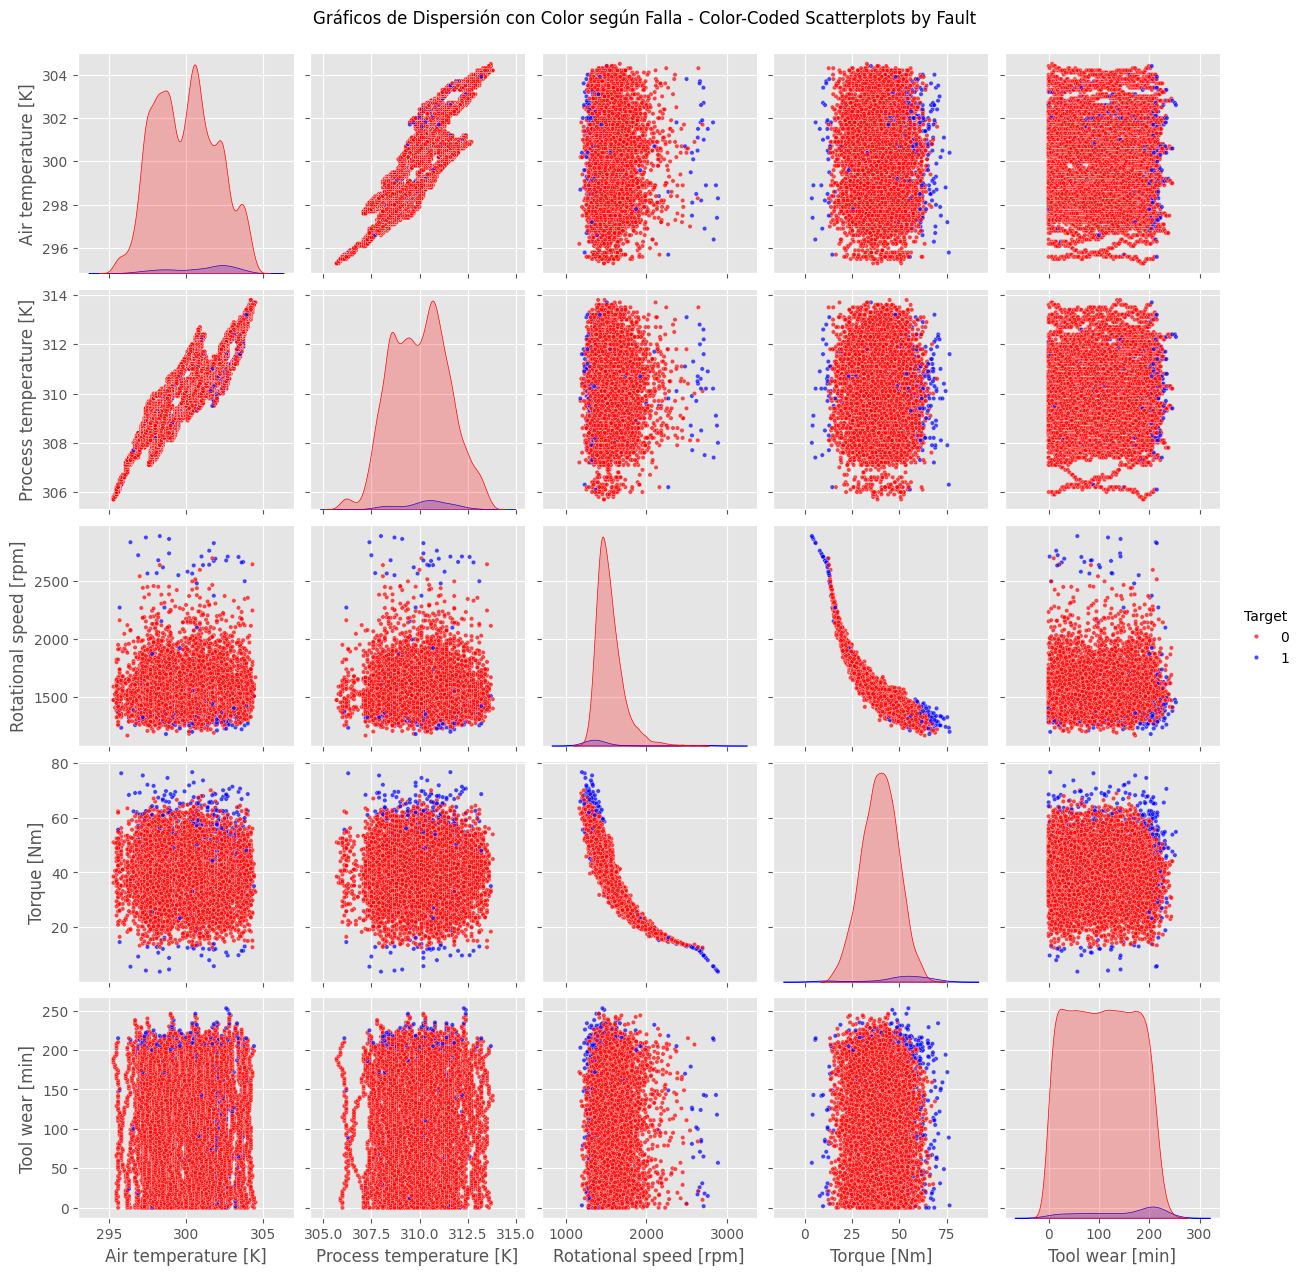

In [12]:
#Seleccionar las variables numéricas Y la variable de destino ('Target') - Select the numeric variables and the destination variable ('Target')
variables = [
    'Air temperature [K]',
    'Process temperature [K]',
    'Rotational speed [rpm]',
    'Torque [Nm]',
    'Tool wear [min]',
    'Target' 
]
df_sel = df[variables]

# Crear los gráficos de dispersión con color según la falla - Create scatter plots with color based on fault type
sns.pairplot(df_sel, hue='Target', palette={0: 'red', 1: 'blue'}, plot_kws={'s': 10, 'alpha': 0.7})

#Mostrar el gráfico - Show the graphs
plt.suptitle('Gráficos de Dispersión con Color según Falla - Color-Coded Scatterplots by Fault', y=1.02)
plt.show()

 #### ⚪ **Matriz de correlación**  - *Correlation matrix*:

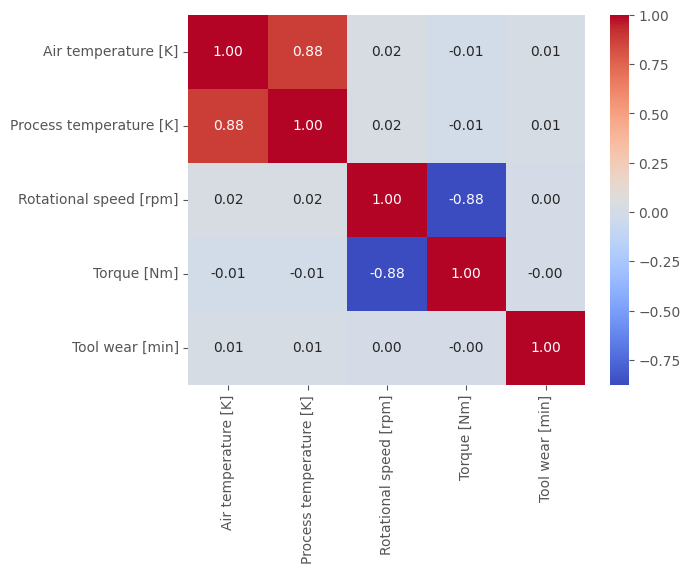

In [13]:
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Mapa de calor de correlación para las columnas numéricas - Correlation heat map for numeric columns
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


Se ve una correlación positiva fuerte entre Process Temperature y Air Temperature (0.88). Además, se ve una correlación negativa fuerte entre Rotational Speed y Torque (-0.88).

*A strong positive correlation is seen between Process Temperature and Air Temperature (0.88). Besides, a strong negative correlation is seen between Rotational Speed and Torque (-0.88)*

 #### ⚪ **Primeras filas del dataset corregido**  - *First rows of the corrected dataset*:

In [14]:
# Observar las primeras filas del dataset corregido - Look at the first rows of the corrected dataset
df.head()

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


 #### ⚪ **Análisis por tipo de producto**  - *Analysis by product type*:

Comprobamos de manera porcentual que el producto H es el que menor porcentaje de fallas tiene, y el producto L es el que más falla. 

*We verify in percentage terms, with product H having the lowest percentage of failures, and product L having the most failures.*

In [15]:
import pandas as pd
df_plot = df.copy()
df_plot['Target_label'] = df_plot['Target'].map({0: 'Not Failure', 1: 'Failure'})

tabla_porcentajes = pd.crosstab(
    index=df_plot['Type'],
    columns=df_plot['Target_label'],
    normalize='index'
).mul(100).round(2)

tabla_porcentajes_ordenada = tabla_porcentajes.sort_values(by='Failure', ascending=False)
tabla_con_formato = tabla_porcentajes_ordenada.applymap(lambda x: f"{x}%")

print(tabla_con_formato)

Target_label Not Failure Failure
Type                            
L                 96.08%   3.92%
M                 97.23%   2.77%
H                 97.91%   2.09%


 #### ⚪ **Análisis de Outliers**  - *Outliers analysis*:

Observamos si existe algún outlier en las variables numericas que quedaron para el análisis.

*We observe whether there are any outliers in the numerical variables that were left for analysis.*

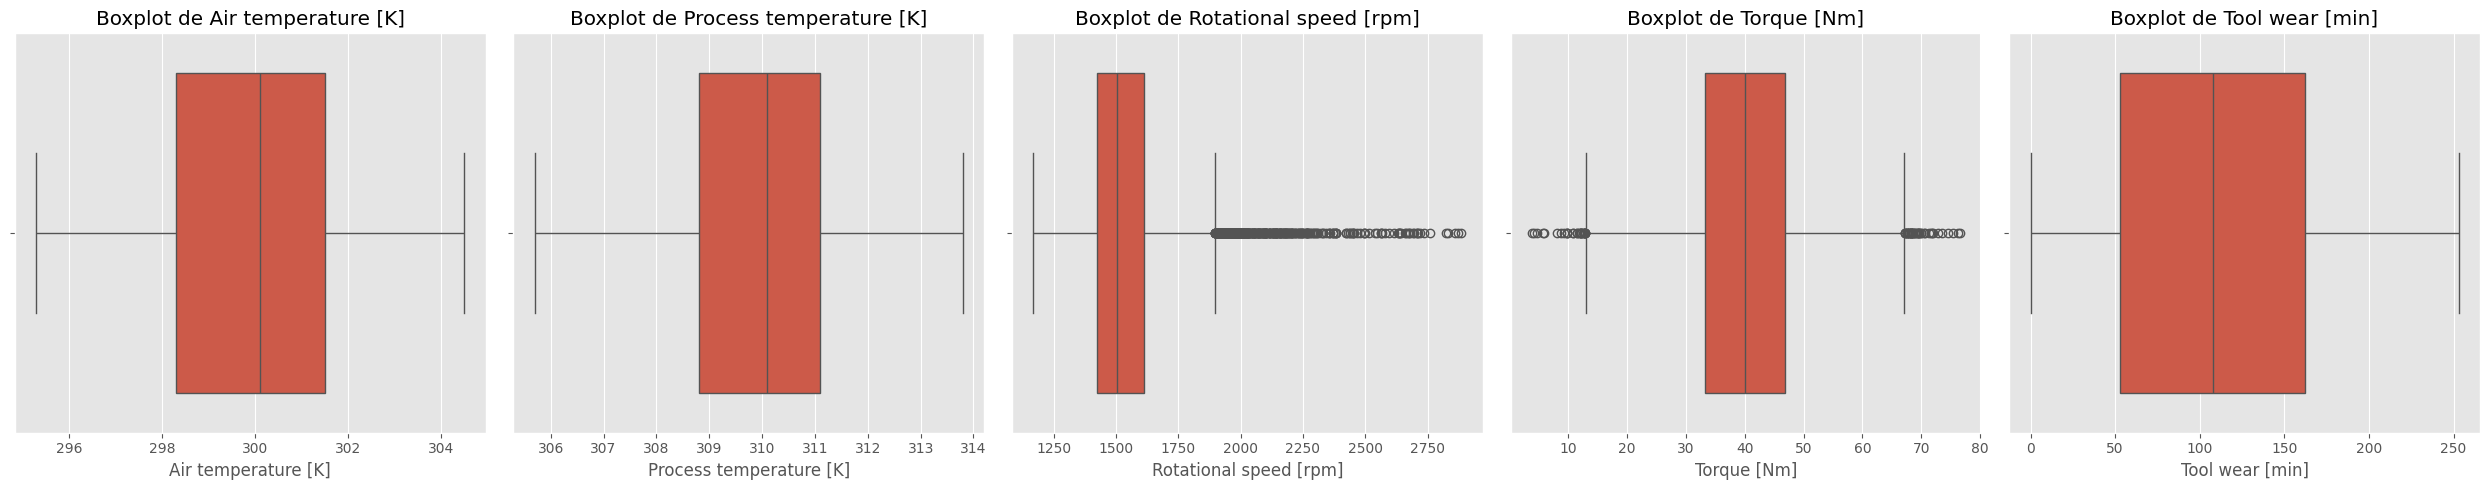

In [16]:
# Crear una figura con 5 subplots en una fila
fig, axes = plt.subplots(1, 5, figsize=(25, 5))

# Boxplot de 'Air temperature [K]'
sns.boxplot(x=df['Air temperature [K]'], ax=axes[0])
axes[0].set_title('Boxplot de Air temperature [K]')

# Boxplot de 'Process temperature [K]'
sns.boxplot(x=df['Process temperature [K]'], ax=axes[1])
axes[1].set_title('Boxplot de Process temperature [K]')

# Boxplot de 'Rotational speed [rpm]'
sns.boxplot(x=df['Rotational speed [rpm]'], ax=axes[2])
axes[2].set_title('Boxplot de Rotational speed [rpm]')

# Boxplot de 'Torque [Nm]'
sns.boxplot(x=df['Torque [Nm]'], ax=axes[3])
axes[3].set_title('Boxplot de Torque [Nm]')

# Boxplot de 'Tool wear [min]'
sns.boxplot(x=df['Tool wear [min]'], ax=axes[4])
axes[4].set_title('Boxplot de Tool wear [min]')

plt.tight_layout()
plt.show()


Se observan que existen outliers en Rotational Speed y Torque. Por el momento los mantendremos en el modelo.

*We can see outliers in the Rotational Speed and Torque. We'll keep them in the model for now.*

### 🟢 **Aplicación de Modelos de Aprendizaje Supervisado**  - *Supervised Learning Models Application*:

 #### ⚪ **Clasificación Binaria**  - *Binary Classification*:

Utilizaremos clasificación binaria, siendo 0: "no falla" y 1: "falla" de la columna Target

*We will use binary classification, where 0: "not failure" and 1: "failure" of the Target column*

 #### 🔵 **1. Regresión Logística**  - *Logistic Regression*:

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix

# Cargar y preparar los datos - Load and prepare the data
df_bin = df.drop(['Failure Type'], axis=1)
X = df_bin.drop(['Target', 'Product ID'], axis=1)
y = df_bin['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Definir el preprocesamiento - Define the preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['Type'])
    ],
    remainder='passthrough'
)

# Crear el pipeline - Create the pipeline
pipeline_lr = Pipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(random_state=42, solver='liblinear'))
])

# Entrenar y evaluar - Train and evaluate
pipeline_lr.fit(X_train, y_train)
y_pred_lr = pipeline_lr.predict(X_test)

print("--- Regresión Logística ---")
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_lr))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred_lr))

# Guardar métricas - Save the metrics 
report_lr = classification_report(y_test, y_pred_lr, output_dict=True)['1']

--- Regresión Logística ---
Matriz de Confusión:
 [[1604  328]
 [  12   56]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.99      0.83      0.90      1932
           1       0.15      0.82      0.25        68

    accuracy                           0.83      2000
   macro avg       0.57      0.83      0.58      2000
weighted avg       0.96      0.83      0.88      2000



 #### 🔵 **2. Bosque aleatorio**  - *Random Forest*:

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix

# Crear el pipeline - Create the pipeline
pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced'))
])

# Entrenar y evaluar - Train and evaluate
pipeline_rf.fit(X_train, y_train)
y_pred_rf = pipeline_rf.predict(X_test)

print("--- Bosque Aleatorio ---")
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_rf))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred_rf))

# Guardar métricas - Save the metrics 
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)['1']

--- Bosque Aleatorio ---
Matriz de Confusión:
 [[1889   43]
 [  22   46]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      1932
           1       0.52      0.68      0.59        68

    accuracy                           0.97      2000
   macro avg       0.75      0.83      0.78      2000
weighted avg       0.97      0.97      0.97      2000



 #### 🔵 **3. XGBoost**  - *XGBoost*:

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix

# Crear el pipeline - Create the pipeline
pipeline_xgb = Pipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', XGBClassifier(random_state=42, eval_metric='logloss'))
])

# Entrenar y evaluar - Train and evaluate
pipeline_xgb.fit(X_train, y_train)
y_pred_xgb = pipeline_xgb.predict(X_test)

print("--- XGBoost ---")
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred_xgb))

# Guardar métricas - Save the metrics 
report_xgb = classification_report(y_test, y_pred_xgb, output_dict=True)['1']

--- XGBoost ---
Matriz de Confusión:
 [[1900   32]
 [  13   55]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      1932
           1       0.63      0.81      0.71        68

    accuracy                           0.98      2000
   macro avg       0.81      0.90      0.85      2000
weighted avg       0.98      0.98      0.98      2000



 #### 🔵 **4. LightGBM**  - *LightGBM*:

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from lightgbm import LGBMClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix

# Crear el pipeline - Create the pipeline
pipeline_lgbm = Pipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LGBMClassifier(random_state=42, class_weight='balanced', verbose=-1))
])

# Entrenar y evaluar - Train and evaluate
pipeline_lgbm.fit(X_train, y_train)
y_pred_lgbm = pipeline_lgbm.predict(X_test)

print("--- LightGBM ---")
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_lgbm))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred_lgbm))

# Guardar métricas - Save the metrics 
report_lgbm = classification_report(y_test, y_pred_lgbm, output_dict=True)['1']

--- LightGBM ---
Matriz de Confusión:
 [[1891   41]
 [  16   52]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      1932
           1       0.56      0.76      0.65        68

    accuracy                           0.97      2000
   macro avg       0.78      0.87      0.82      2000
weighted avg       0.98      0.97      0.97      2000



 #### 🟠 **Comparación de modelos binarios**  - *Binary Models Comparition*:

In [21]:
import pandas as pd
from IPython.display import display

# Crear el DataFrame con los resultados
results_df = pd.DataFrame({
    'Precision': [report_lr['precision'], report_rf['precision'], report_xgb['precision'], report_lgbm['precision']],
    'Recall': [report_lr['recall'], report_rf['recall'], report_xgb['recall'], report_lgbm['recall']],
    'F1-Score': [report_lr['f1-score'], report_rf['f1-score'], report_xgb['f1-score'], report_lgbm['f1-score']]
}, index=['Regresión Logística', 'Bosque Aleatorio', 'XGBoost', 'LightGBM'])

# Ordenar por F1-Score
df_resultados_ordenado = results_df.sort_values(by='F1-Score', ascending=False)

# Aplicar estilo sin color
print("\n--- Tabla Comparativa de Métricas (Clase: Falla) ---")
styled_df = df_resultados_ordenado.style \
    .set_caption("Tabla Comparativa de Métricas (Clase: Falla)") \
    .format("{:.2f}") \
    .set_table_styles([
        {'selector': 'caption', 'props': [('font-size', '16px'), ('font-weight', 'bold')]},
        {'selector': 'th.col_heading', 'props': [('font-size', '12px')]},
        {'selector': 'th.row_heading', 'props': [('font-size', '12px')]}
    ])
display(styled_df)


--- Tabla Comparativa de Métricas (Clase: Falla) ---


,Precision,Recall,F1-Score
XGBoost,0.63,0.81,0.71
LightGBM,0.56,0.76,0.65
Bosque Aleatorio,0.52,0.68,0.59
Regresión Logística,0.15,0.82,0.25


**Conclusiones por modelo**

 #### ⚪ **Predicción probando diferentes valores**  - *Prediction by testing different values*:

In [23]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier # Importa XGBoost
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, classification_report

# Nota: Asegúrate de tener df, X_train, y_train, preprocessor, etc. definidos antes
# (son los del código anterior). Este es un ejemplo para ilustrar el uso.
X = df_bin.drop(['Target', 'Product ID'], axis=1)
y = df_bin['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['Type'])
    ],
    remainder='passthrough'
)

# Creamos el pipeline de XGBoost para el ejemplo
pipeline_xgb = Pipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', XGBClassifier(random_state=42, eval_metric='logloss'))
])
pipeline_xgb.fit(X_train, y_train)

# --- A partir de aquí, el código original corregido ---

def predecir_falla(modelo_pipeline, tipo, temp_aire, temp_proceso, vel_rotacion, torque, desgaste_herramienta):
    """
    Función para predecir si una máquina fallará o no, dado un conjunto de parámetros.
    Esta función utiliza un pipeline entrenado que maneja el preprocesamiento interno.

    Args:
        modelo_pipeline: El pipeline de Machine Learning entrenado.
        tipo (str): El tipo de producto ('L', 'M', 'H').
        temp_aire (float): La temperatura del aire en Kelvin [K].
        temp_proceso (float): La temperatura del proceso en Kelvin [K].
        vel_rotacion (int): La velocidad de rotación en [rpm].
        torque (float): El torque en [Nm].
        desgaste_herramienta (int): El desgaste de la herramienta en [min].

    Returns:
        int: La predicción (1 si hay falla, 0 si no).
    """

    # Crear un DataFrame con TODAS las columnas usadas en el entrenamiento
    datos_entrada = {
        'Type': [tipo],
        'Air temperature [K]': [temp_aire],
        'Process temperature [K]': [temp_proceso],
        'Rotational speed [rpm]': [vel_rotacion],
        'Torque [Nm]': [torque],
        'Tool wear [min]': [desgaste_herramienta]
    }
    df_entrada = pd.DataFrame(datos_entrada)

    # El pipeline se encarga de todo el preprocesamiento internamente
    prediccion = modelo_pipeline.predict(df_entrada)

    return prediccion[0]

# Ejemplo de uso de la función con todos los parámetros
# (Los valores son un ejemplo; puedes cambiarlos)
prediccion_ejemplo = predecir_falla(
    modelo_pipeline=pipeline_xgb,
    tipo='L',
    temp_aire=302,
    temp_proceso=312,
    vel_rotacion=1300,
    torque=75,
    desgaste_herramienta=250
)

print(f"Predicción (0=No Falla, 1=Falla): {prediccion_ejemplo}")

Predicción (0=No Falla, 1=Falla): 1


 #### ⚪ **Clasificación Multiclase**  - *Multiclass Classification*:

Para el análisis de clasificación multiclase, se han visualizado los distintos tipos de falla en función de las variables numéricas del modelo. Se omitieron los casos de "no falla" con el objetivo de optimizar la identificación de patrones en los eventos de falla.

*For the multiclass classification analysis, the different failure types were visualized based on the numerical variables of the model. Non-failure cases were omitted to optimize pattern identification in failure events.*

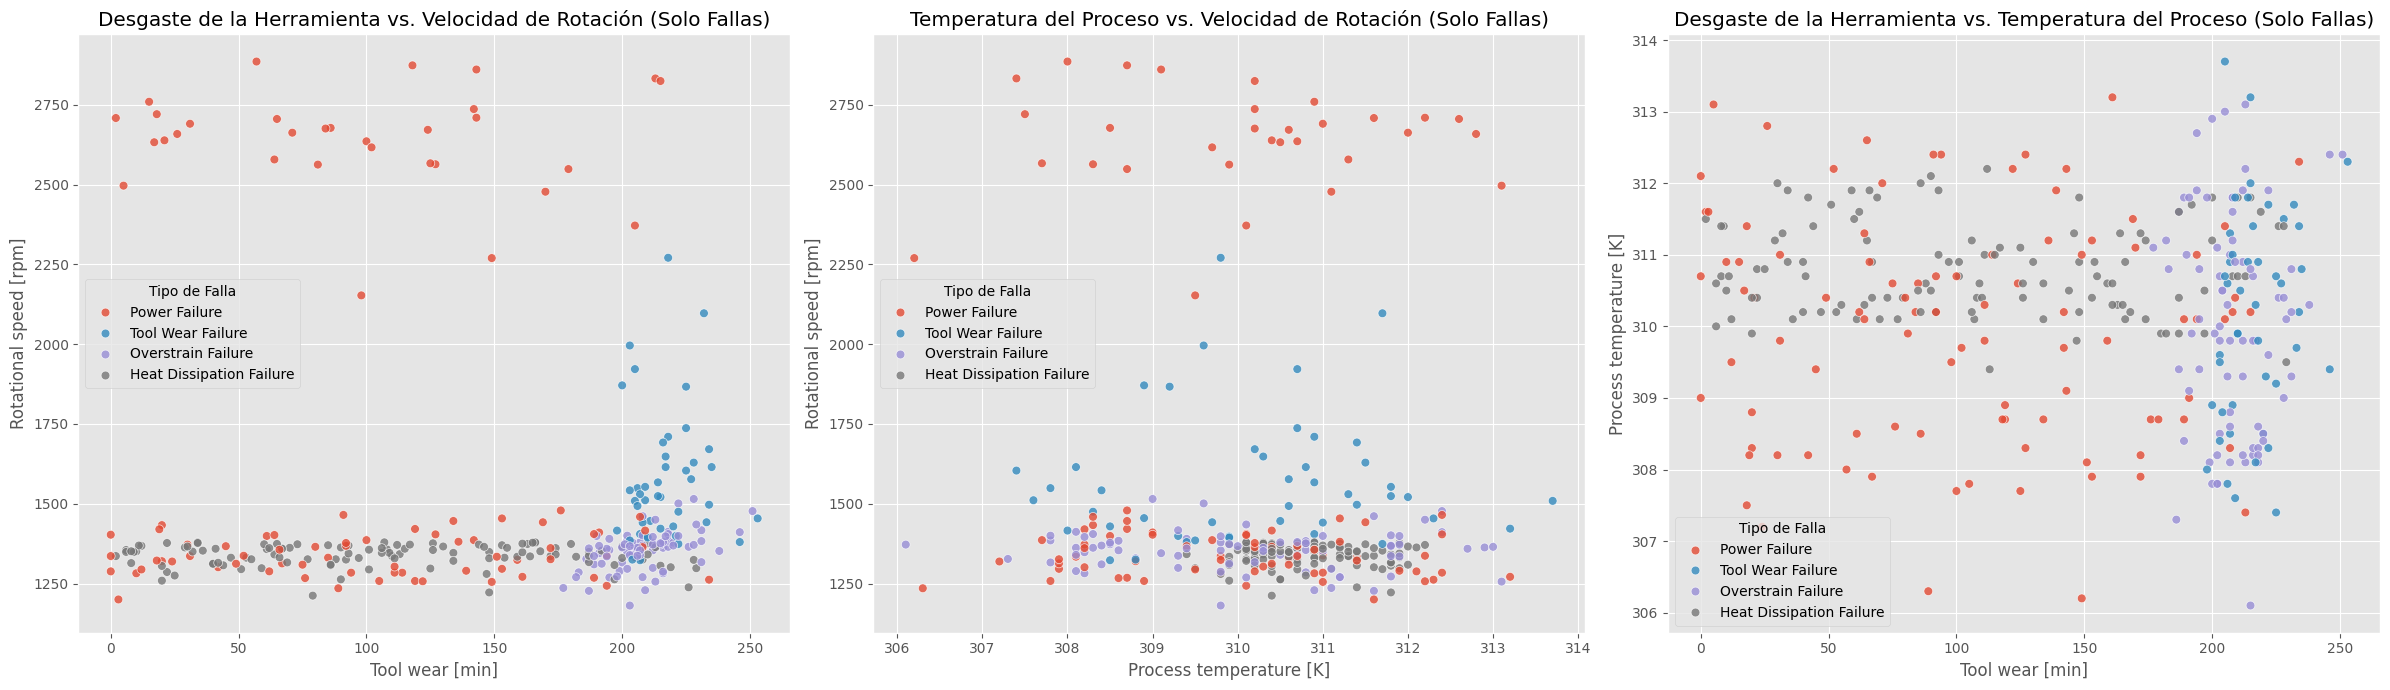

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Creamos una copia del DataFrame original para no modificarlo
df_plot = df.copy()

# Eliminar las filas donde el Target es '1' pero el Failure Type es 'No Failure'
df_plot = df_plot[~((df_plot['Target'] == 1) & (df_plot['Failure Type'] == 'No Failure'))].copy()

# Filtramos el DataFrame para incluir solo las filas donde hubo una falla
df_only_failures = df_plot[df_plot['Target'] == 1].copy()

# Eliminar la categoría 'No Failure' de la columna 'Failure Type'
# Esto asegura que no aparezca en la leyenda
df_only_failures = df_only_failures[df_only_failures['Failure Type'] != 'No Failure']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24, 7), sharey=False)

# --- 1. Desgaste de la Herramienta vs. Velocidad de Rotación ---
sns.scatterplot(
    ax=axes[0],
    data=df_only_failures,
    x='Tool wear [min]',
    y='Rotational speed [rpm]',
    hue='Failure Type',  # Coloreamos por el tipo de falla
    alpha=0.8,
    s=40
)
axes[0].set_title('Desgaste de la Herramienta vs. Velocidad de Rotación (Solo Fallas)')

# --- 2. Temperatura del Proceso vs. Velocidad de Rotación ---
sns.scatterplot(
    ax=axes[1],
    data=df_only_failures,
    x='Process temperature [K]',
    y='Rotational speed [rpm]',
    hue='Failure Type',
    alpha=0.8,
    s=40
)
axes[1].set_title('Temperatura del Proceso vs. Velocidad de Rotación (Solo Fallas)')

# --- 3. Desgaste de la Herramienta vs. Temperatura del Proceso ---
sns.scatterplot(
    ax=axes[2],
    data=df_only_failures,
    x='Tool wear [min]',
    y='Process temperature [K]',
    hue='Failure Type',
    alpha=0.8,
    s=40
)
axes[2].set_title('Desgaste de la Herramienta vs. Temperatura del Proceso (Solo Fallas)')

# Ajustar la leyenda y el layout
axes[0].legend(title='Tipo de Falla')
axes[1].legend(title='Tipo de Falla')
axes[2].legend(title='Tipo de Falla')

plt.tight_layout()
plt.show()

**Análisis de los Gráficos**

Para cada tipo de falla: 

- **`Heat Dissipation Failure`**:  Se ve una concentración de fallas de este tipo a bajas RPM y en un rango de temperaturas aproximado de 308 a 312 K.
- **`Overstrain Failure`**: Se ve una concentración de fallas de este tipo a bajas RPM y alto desgaste de la máquina. 
- **`Power Failure`**: Se ve una concentración de fallas de este tipo en dos zonas, una de altas RPM y otra de baja RPM. 
- **`Random Failure`**: Son muy pocas y no tiene un patrón definido. 
- **`Tool Wear Failure`**: Se ve una concentración de fallas de este tipo cuando existe alto desgaste de la máquina.

***Analysis of the Graphs***

*For each failure type:*

- ***`Heat Dissipation Failure`**: A concentration of this type of failure is seen at low RPM and in a temperature range of approximately 308 to 312 K.*
- ***`Overstrain Failure`**: A concentration of this type of failure is seen at low RPM and high machine wear.*
- ***`Power Failure`**: A concentration of this type of failure is seen in two zones, one at high RPM and one at low RPM.*
- ***`Random Failure`**: These failures are very few and do not have a defined pattern.*
- ***`Tool Wear Failure`**: A concentration of this type of failure is seen when the machine is subject to high wear.*

Se analizará la distribución entre los casos de éxito y las fallas, así como la cantidad de fallas por cada tipo.

*The distribution between success cases and failures will be analyzed, as well as the number of failures for each type.*

In [ ]:
# Ver distribución de las variables categóricas - See distribution of categorical variables
print(df['Type'].value_counts())
print(df['Target'].value_counts())
print(df['Failure Type'].value_counts())

Type
L    6000
M    2997
H    1003
Name: count, dtype: int64
Target
0    9661
1     339
Name: count, dtype: int64
Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64


 #### 🔵 **Random Forest**  - *Bosque Aleatorio*:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# 1. Preparar el DataFrame para la clasificación multiclase - Prepare the DataFrame for multiclass classification
df_mul = df.copy()
df_mul = df_mul.drop(['Target', 'Product ID'], axis=1)

# 2. Separar las características (X) y el objetivo (y) - Separate the features (X) and the objective (y)
X = df_mul.drop(['Failure Type'], axis=1)
y = df_mul['Failure Type']

# 3. Separar los datos en conjuntos de entrenamiento y prueba - Separate the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# 4. Definir el preprocesamiento - Define preprocessing
categorical_features = ['Type']

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# 5. Aplicar SMOTE después del preprocesamiento - Apply SMOTE after preprocessing

X_train_encoded = preprocessor.fit_transform(X_train)
y_train_numeric, unique_labels = pd.factorize(y_train)
smote = SMOTE(random_state=42)
X_resampled, y_resampled_numeric = smote.fit_resample(X_train_encoded, y_train_numeric)
label_map = {idx: label for idx, label in enumerate(unique_labels)}
y_resampled = pd.Series(y_resampled_numeric).map(label_map)

# 6. Entrenar el modelo de Random Forest con los datos re-balanceados - Train the Random Forest model with the rebalanced data
rf_classifier_mul = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'
)

rf_classifier_mul.fit(X_resampled, y_resampled)

# 7. Evaluar el modelo con los datos de prueba no modificados - Evaluate the model with unmodified test data
X_test_encoded = preprocessor.transform(X_test)
y_pred = rf_classifier_mul.predict(X_test_encoded)

# 8. Mostrar los resultados - Show results
print("Matriz de Confusión - Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación - Classification Report:\n", classification_report(y_test, y_pred))

Matriz de Confusión - Confusion Matrix:
 [[  20    2    0    0    0    0]
 [   4 1903    4    5    8    6]
 [   0    5   11    0    0    0]
 [   0    6    0   13    0    0]
 [   0    4    0    0    0    0]
 [   0    9    0    0    0    0]]

Reporte de Clasificación - Classification Report:
                           precision    recall  f1-score   support

Heat Dissipation Failure       0.83      0.91      0.87        22
              No Failure       0.99      0.99      0.99      1930
      Overstrain Failure       0.73      0.69      0.71        16
           Power Failure       0.72      0.68      0.70        19
         Random Failures       0.00      0.00      0.00         4
       Tool Wear Failure       0.00      0.00      0.00         9

                accuracy                           0.97      2000
               macro avg       0.55      0.54      0.54      2000
            weighted avg       0.97      0.97      0.97      2000



A pesar de tener una precisión general alta (0.92), en este caso particular, el modelo multiclase no es confiable para predecir fallas. El problema es que el modelo es muy deficiente para detectar los eventos de fallas reales. Estos valores indican que el modelo predice "No Falla" la mayor parte del tiempo.

El bajo rendimiento se debe al extremo desbalance de clases. En el conjunto de datos, hay muy pocos casos de fallas en comparación con los casos de "No Falla" en varios tipos.

Debido a esto, no es viable continuar con un modelo multiclase, ya que ese problema fundamental persistiría y sería aún más complicado. Es mejor quedarse con el modelo binario que es más simple, pero eficaz.

*Despite having a high overall accuracy (0.92), in this particular case, the multiclass model is not reliable in predicting failures. The problem is that the model is very poor at detecting actual failure events. These values indicate that the model predicts "No Failure" most of the time.*

*The poor performance is due to extreme class imbalance. In the dataset, there are very few failure cases compared to "No Failure" cases in several types.*

*Because of this, it is not feasible to continue with a multiclass model, as that fundamental problem would persist and would be even more complicated. It is better to stick with the binary model, which is simpler, yet effective.*